# Dynex SDK - 测试SDK

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import dynex
import dimod
from pyqubo import Array

## 验证Dynex版本

In [34]:
dynex.__version__

'0.1.10'

## 测试您的配置

需要成功运行才能开始使用 Dynex SDK 进行采样。在使用 Dynex SDK 进行采样之前，必须确保之前的运行是成功的，以确保系统或配置处于正常工作状态。

In [35]:
dynex.test()

[DYNEX] TEST: dimod BQM construction...
[DYNEX] PASSED
[DYNEX] TEST: Dynex Sampler object...
[DYNEX] PASSED
[DYNEX] TEST: uploading computing file...


file upload progress:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

[DYNEX] PASSED
[DYNEX] TEST: submitting sample file...


file upload progress:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

[DYNEX] PASSED
[DYNEX] TEST: retrieving samples...
[DYNEX] PASSED
[DYNEX] TEST: worker access to computing files
[DYNEX] PASSED
[DYNEX] TEST RESULT: ALL TESTS PASSED


## 查看你账户的API

In [36]:
dynex.account_status()

ACCOUNT: njyqnacl@vip.qq.com
API SUCCESSFULLY CONNECTED TO DYNEX
-----------------------------------
ACCOUNT LIMITS:
MAXIMUM NUM_READS: 100,000
MAXIMUM ANNEALING_TIME: 10,000
MAXIMUM JOB DURATION: 60 MINUTES

USAGE:
TOTAL USAGE: 123,000,000 / 1,000,000,000 ( 12.3 %) NUM_READS x ANNEALING_TIME


## 创建一个简单的QUBO公式

In [37]:
N = 15
K = 3
numbers = [4.8097315016016315, 4.325157567810298, 2.9877429101815127,
           3.199880179616316, 0.5787939511978596, 1.2520928214246918,
           2.262867466401502, 1.2300003067401255, 2.1601079352817925,
           3.63753899583021, 4.598232793833491, 2.6215815162575646,
           3.4227134835783364, 0.28254151584552023, 4.2548151473817075]

q = Array.create('q', N, 'BINARY')
H = sum(numbers[i] * q[i] for i in range(N)) + 5.0 * (sum(q) - K)**2
model = H.compile()
Q, offset = model.to_qubo(index_label=True)

In [38]:
# 从QUBO导入BQM:
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset)

## 在Dynex上进行采样

In [39]:
model = dynex.BQM(bqm);
sampler = dynex.DynexSampler(model,  mainnet=True, description='Dynex SDK_Rumony_1');
sampleset = sampler.sample(num_reads=5000, annealing_time = 200, debugging=False);
print('结果:')
print(sampleset)

╭────────────┬───────────┬────────────────┬─────────┬─────────┬────────────────╮
│   DYNEXJOB │   ELAPSED │   WORKERS READ │   CHIPS │   STEPS │   GROUND STATE │
├────────────┼───────────┼────────────────┼─────────┼─────────┼────────────────┤
│       7767 │      0.31 │              1 │    4992 │     200 │      290466.00 │
╰────────────┴───────────┴────────────────┴─────────┴─────────┴────────────────╯
╭───────────────────────────────────┬───────────┬─────────┬───────┬──────────┬───────────┬───────────────┬──────────╮
│                            WORKER │   VERSION │   CHIPS │   LOC │   ENERGY │   RUNTIME │   LAST UPDATE │   STATUS │
├───────────────────────────────────┼───────────┼─────────┼───────┼──────────┼───────────┼───────────────┼──────────┤
│       *** WAITING FOR WORKERS *** │           │         │       │          │           │               │          │
│ Boost job priority: <coming soon> │           │         │       │          │           │               │          │
╰────

## 在Dynex上使用克隆进行采样

In [40]:
model = dynex.BQM(bqm);
sampler = dynex.DynexSampler(model,  mainnet=True, description='Dynex SDK_Rumony_2');
sampleset = sampler.sample(num_reads=20000, annealing_time = 1000, clones = 4, debugging=False);
print('结果:')
print(sampleset)

[DYNEX] STARTING SAMPLING ( 4 CLONES )...
结果:
   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14   energy num_oc.
0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0 2.091336       4
['BINARY', 1 rows, 4 samples, 15 variables]


## 绘制样本集

In [41]:
import matplotlib.pyplot as plt
import numpy as np

P:\pythonProject\DynexSDK\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\pythonProject\DynexSDK\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\pythonProject\DynexSDK\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\pythonProject\DynexSDK\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
P:\pythonProject\DynexSDK\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current fon

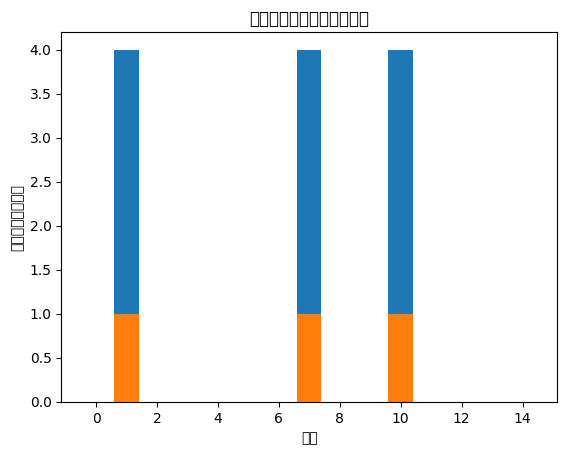

In [42]:
# 总的数据:
data = np.zeros(len(sampleset.variables)) 
for s in sampleset.record: #s[0] samples [1] energy [2] num_oc
    for i in range(0,len(s[0])):
        data[i] += ( s[0][i] * s[2] ); # w按 num_oc 加权

plt.bar(sampleset.variables, data)
plt.bar(sampleset.variables, sampleset.first.sample.values())
plt.xlabel("变量")
plt.ylabel("出现次数（正数）")
plt.title("样本集（橙色：最低基态）")
plt.show() 